**Task1 Credit Scoring Model**



*Description*

Develop a credit scoring model to predict the
creditworthiness of individuals based on historical
financial data. Utilize classification algorithms and
assess the model's accuracy.

1- Importing data set which is german credit dataset

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures  
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data=pd.read_csv("../german_credit_data.csv")

In [3]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

**Pre processing**


In [5]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
#Dropping null values
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Find The outliers within the data

In [8]:

numericData = data.select_dtypes(include='number').columns

# Get the interquartile range by getting Q1 and Q3
Q1 = data[numericData].quantile(0.25)
Q3 = data[numericData].quantile(0.75)

IQR = Q3 - Q1

# Get whiskers to calculate the outliers
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)



outliers = data[(data[numericData] < minimum) | (data[numericData] > maximum)]

print("The outliers are ")
print(outliers)

The outliers are 
     Age  Sex  Job Housing Saving accounts Checking account  Credit amount  \
1    NaN  NaN  NaN     NaN             NaN              NaN            NaN   
3    NaN  NaN  NaN     NaN             NaN              NaN            NaN   
4    NaN  NaN  NaN     NaN             NaN              NaN            NaN   
7    NaN  NaN  3.0     NaN             NaN              NaN            NaN   
9    NaN  NaN  3.0     NaN             NaN              NaN            NaN   
..   ...  ...  ...     ...             ...              ...            ...   
989  NaN  NaN  1.0     NaN             NaN              NaN            NaN   
993  NaN  NaN  3.0     NaN             NaN              NaN            NaN   
996  NaN  NaN  3.0     NaN             NaN              NaN            NaN   
998  NaN  NaN  NaN     NaN             NaN              NaN            NaN   
999  NaN  NaN  NaN     NaN             NaN              NaN            NaN   

     Duration Purpose  
1         NaN     NaN

In [9]:
outliers.count()

Age                  18
Sex                   0
Job                 209
Housing               0
Saving accounts       0
Checking account      0
Credit amount        36
Duration              8
Purpose               0
dtype: int64

Fill the outliers data with Mean value of Numeric data

In [10]:

# Calculate the mean of each column
meanValue = data[numericData].mean()

# Convert outliers DataFrame to boolean
outliers_bool = outliers.notnull()

# Fill outliers with the mean
data[numericData] = data[numericData].mask(outliers_bool, meanValue, axis=0)

# Print the modified DataFrame
print(data)
print(meanValue)


      Age     Sex  Job Housing Saving accounts Checking account  \
1    22.0  female  2.0     own          little         moderate   
3    45.0    male  2.0    free          little           little   
4    53.0    male  2.0    free          little           little   
7    35.0    male  NaN    rent          little         moderate   
9    28.0    male  NaN     own          little         moderate   
..    ...     ...  ...     ...             ...              ...   
989  48.0    male  NaN     own          little         moderate   
993  30.0    male  NaN     own          little           little   
996  40.0    male  NaN     own          little           little   
998  23.0    male  2.0    free          little           little   
999  27.0    male  2.0     own        moderate         moderate   

     Credit amount  Duration              Purpose  
1           5951.0      48.0             radio/TV  
3           7882.0      42.0  furniture/equipment  
4           4870.0      24.0           

**Visualization**

Count Plot

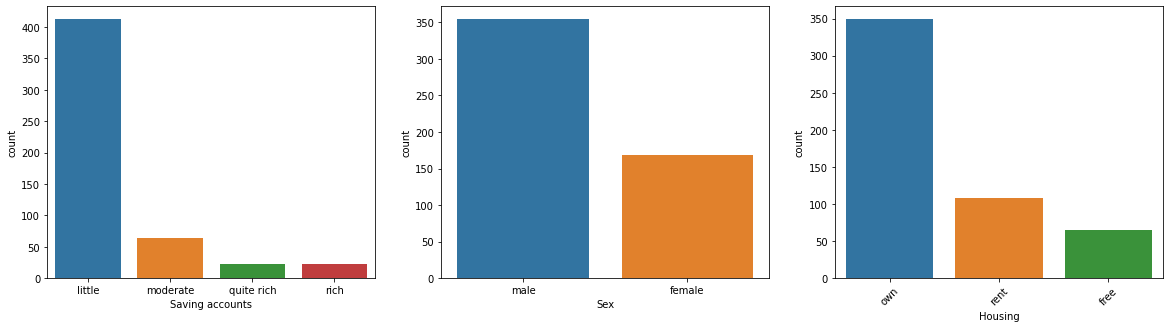

In [11]:
columns = {0:'Saving accounts', 1: 'Sex', 2: 'Housing'}
fig, ax = plt.subplots(1,3, figsize=(20, 5))

for key, val in columns.items(): 
    sns.countplot(x=val,  data=data, ax=ax[key], order = data[val].value_counts().index)
    plt.xticks(rotation=45)

Histogram

Text(0.5, 1.0, "Person's Age Distribution")

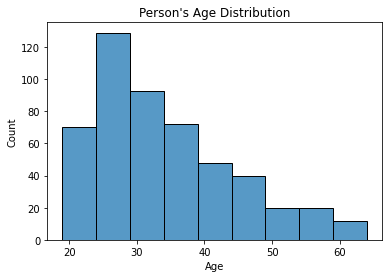

In [12]:
# age distribution
sns.histplot(data=data, x ='Age', binwidth=5)
plt.title("Person's Age Distribution")

Box Plot

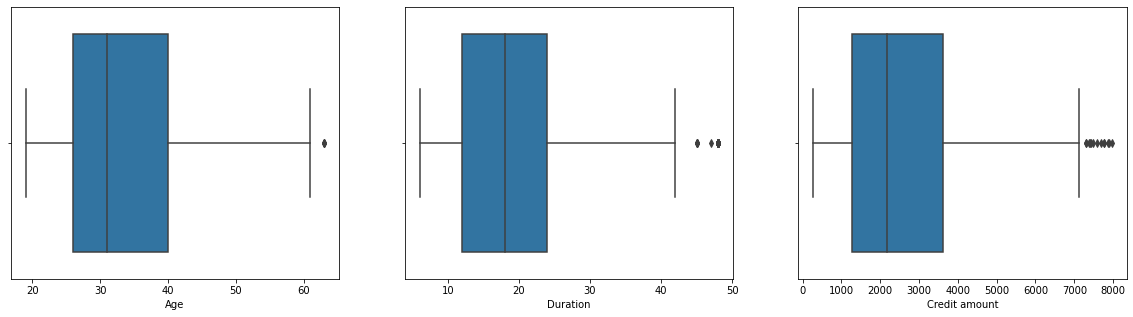

In [13]:
columns = {0:'Age' , 1: 'Duration', 2: 'Credit amount'}
fig, ax = plt.subplots(1,len(columns), figsize=(20, 5))
for key, val in columns.items(): 
    sns.boxplot(x=data[val], ax= ax[key])

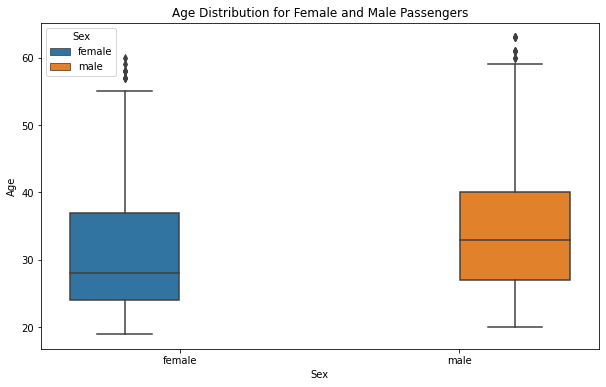

In [14]:


# Create a boxplot figure for female and male passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=data, hue='Sex')
plt.title('Age Distribution for Female and Male Passengers')
plt.show()

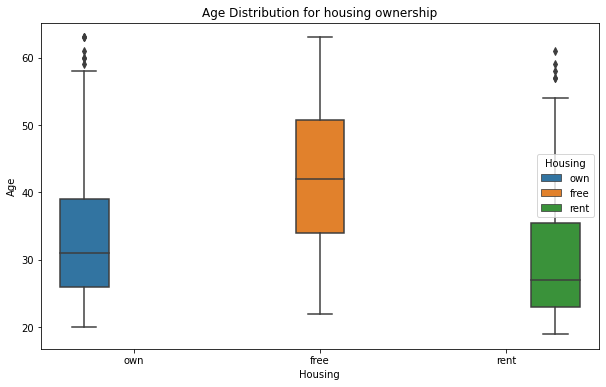

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Housing', y='Age', data=data, hue='Housing')
plt.title('Age Distribution for housing ownership')
plt.show()

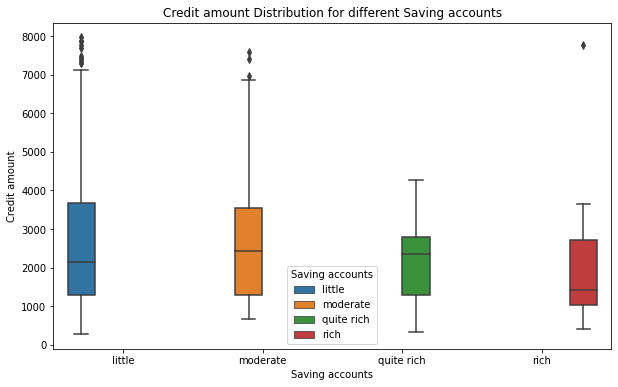

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Saving accounts', y='Credit amount', data=data, hue='Saving accounts')
plt.title('Credit amount Distribution for different Saving accounts')
plt.show()

Bar Plot

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


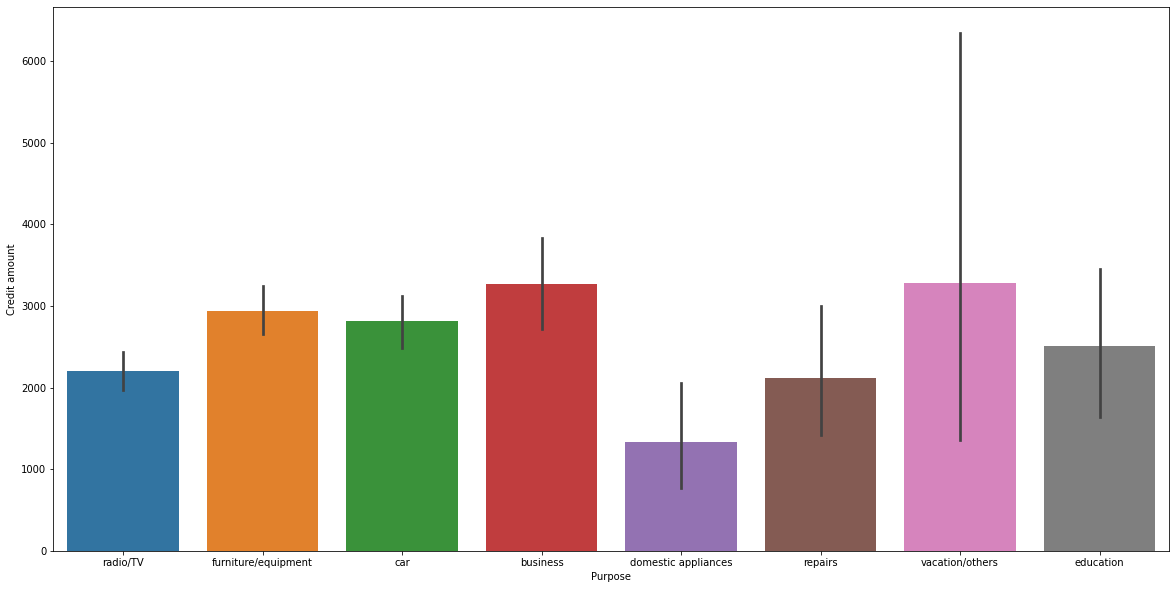

In [17]:
plt.figure(figsize=(20, 10))
sns.barplot(data=data,x='Purpose',y='Credit amount')
plt.show()

**Correlation heatmap**

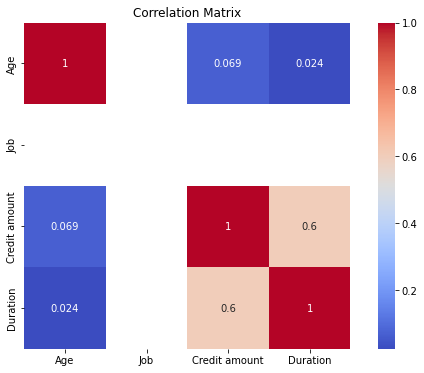

In [18]:
# check for correlation among the features

corr = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Encode Categorical to numeric

In [19]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])


data['Checking account'] = label_encoder.fit_transform(data['Checking account'])
data['Saving accounts'] = label_encoder.fit_transform(data['Saving accounts'])
data['Housing'] = label_encoder.fit_transform(data['Housing'])

In [20]:
print (data)

      Age  Sex  Job  Housing  Saving accounts  Checking account  \
1    22.0    0  2.0        1                0                 1   
3    45.0    1  2.0        0                0                 0   
4    53.0    1  2.0        0                0                 0   
7    35.0    1  NaN        2                0                 1   
9    28.0    1  NaN        1                0                 1   
..    ...  ...  ...      ...              ...               ...   
989  48.0    1  NaN        1                0                 1   
993  30.0    1  NaN        1                0                 0   
996  40.0    1  NaN        1                0                 0   
998  23.0    1  2.0        0                0                 0   
999  27.0    1  2.0        1                1                 1   

     Credit amount  Duration              Purpose  
1           5951.0      48.0             radio/TV  
3           7882.0      42.0  furniture/equipment  
4           4870.0      24.0           

In [26]:
data.dropna()
x=data.drop(['Purpose'], axis=1)
y=data['Purpose']

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=33)

In [27]:
model_rf = RandomForestClassifier(n_estimators=500 , n_jobs = -1,random_state =50,max_leaf_nodes = 30, criterion = 'entropy',min_samples_leaf=2)
# fitting the model
from sklearn.impute import SimpleImputer

model_rf.fit(X_train, y_train)


# make predictions
prediction_test = model_rf.predict(X_test)
accuracy= accuracy_score (y_test, prediction_test)
print(accuracy)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values